In [25]:
import mne
import os

# load cleaned data

raw_path = os.path.join("processed", "sub-NDARAA396TWZ_task-DespicableMe_eeg_clean.fif")
raw = mne.io.read_raw_fif(raw_path, preload=True)

Opening raw data file processed\sub-NDARAA396TWZ_task-DespicableMe_eeg_clean.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 129) active
    Range : 0 ... 106517 =      0.000 ...   213.034 secs
Ready.
Reading 0 ... 106517  =      0.000 ...   213.034 secs...


C:\Users\JINQI\AppData\Local\Temp\ipykernel_30104\2780191478.py:7: RuntimeWarning: This filename (processed\sub-NDARAA396TWZ_task-DespicableMe_eeg_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


Effective window size : 4.096 (s)


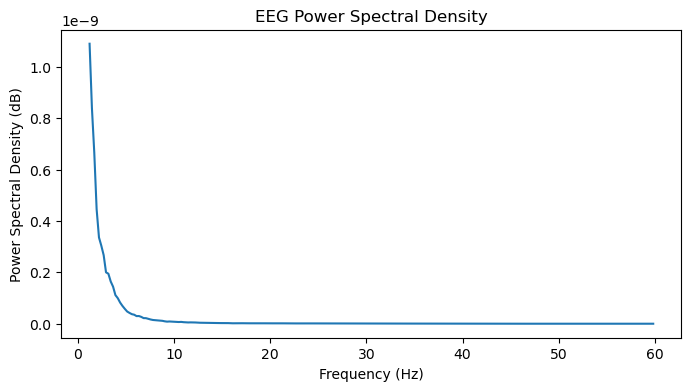

In [37]:
import matplotlib.pyplot as plt
# power spectral density

# pick only EEG channels
data = raw.get_data(picks='eeg')
sfreq = raw.info['sfreq']

psd, freqs = mne.time_frequency.psd_array_welch(
    data,
    sfreq=sfreq,
    fmin=1,
    fmax=60,
    n_fft=2048,
    average="mean"
)

plt.figure(figsize=(8, 4))
plt.plot(freqs, psd.mean(axis=0))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (dB)")
plt.title("EEG Power Spectral Density")
plt.show()

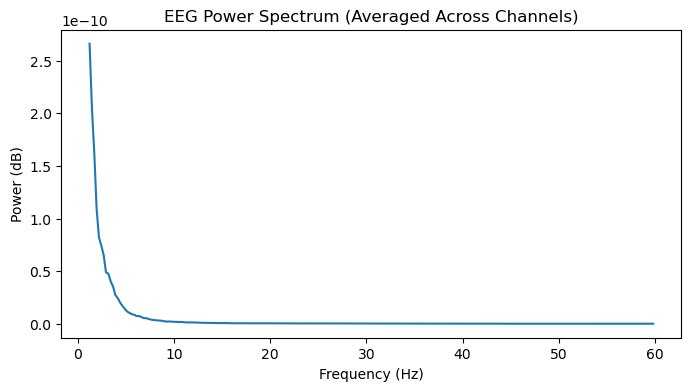

In [35]:
# power spectrum

df = freqs[1] - freqs[0]
power_spectrum = psd * df

plt.figure(figsize=(8, 4))
plt.plot(freqs, power_spectrum.mean(axis=0))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB)")
plt.title("EEG Power Spectrum (Averaged Across Channels)")
plt.show()

Reading c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\processed\sub-NDARAA396TWZ_task-DespicableMe_eeg_ica.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 129) active
Now restoring ICA solution ...
Ready.
Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (20 components)
    Zeroing out 3 ICA components
    Projecting back using 129 PCA components
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\JINQI\anaconda3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


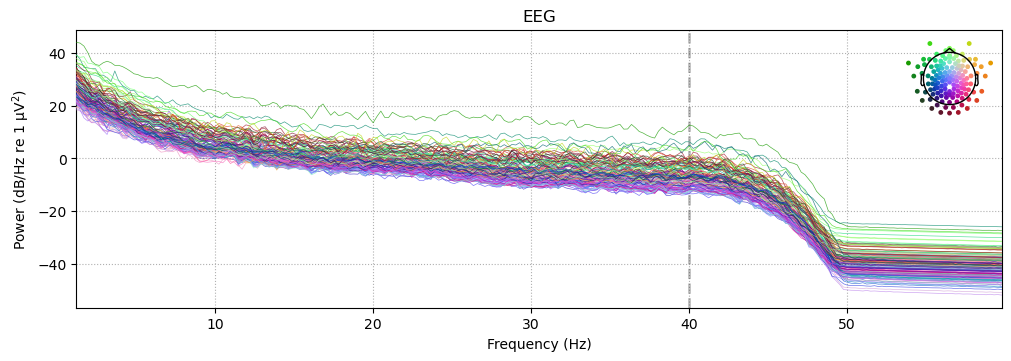

In [50]:
ica_path = os.path.join('processed', 'sub-NDARAA396TWZ_task-DespicableMe_eeg_ica.fif')
ica = mne.preprocessing.read_ica(ica_path)
ica.apply(raw)

psd_plot = raw.plot_psd(fmin=1, fmax=60)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Effective window size : 0.512 (s)


c:\Users\JINQI\anaconda3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


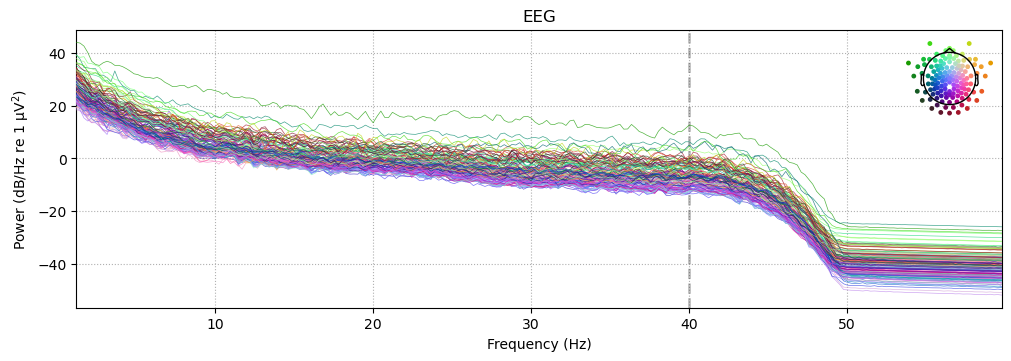

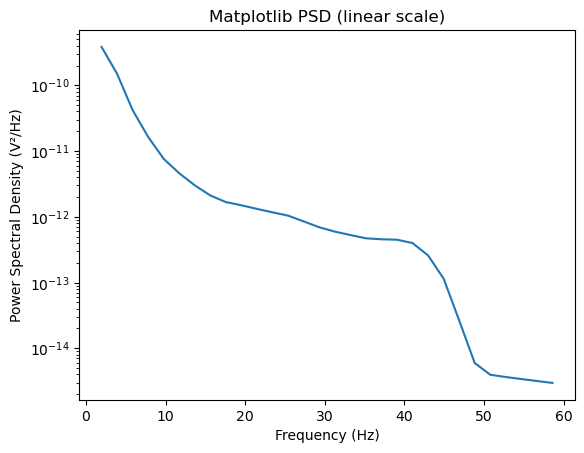

In [ ]:
import mne
from mne.time_frequency import psd_array_welch
import matplotlib.pyplot as plt

# comparison

raw.plot_psd(fmin=1, fmax=60)

data, times = raw.get_data(return_times=True)
psd, freqs = psd_array_welch(data, sfreq=raw.info['sfreq'], fmin=1, fmax=60)

plt.figure()
plt.semilogy(freqs, psd.mean(axis=0))
plt.title('Matplotlib PSD (linear scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V²/Hz)')
plt.show()

Opening raw data file ./processed/sub-NDARAA396TWZ_task-DespicableMe_eeg_clean.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 129) active
    Range : 0 ... 106517 =      0.000 ...   213.034 secs
Ready.
Reading 0 ... 106517  =      0.000 ...   213.034 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\JINQI\AppData\Local\Temp\ipykernel_30104\3875082828.py:9: RuntimeWarning: This filename (./processed/sub-NDARAA396TWZ_task-DespicableMe_eeg_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


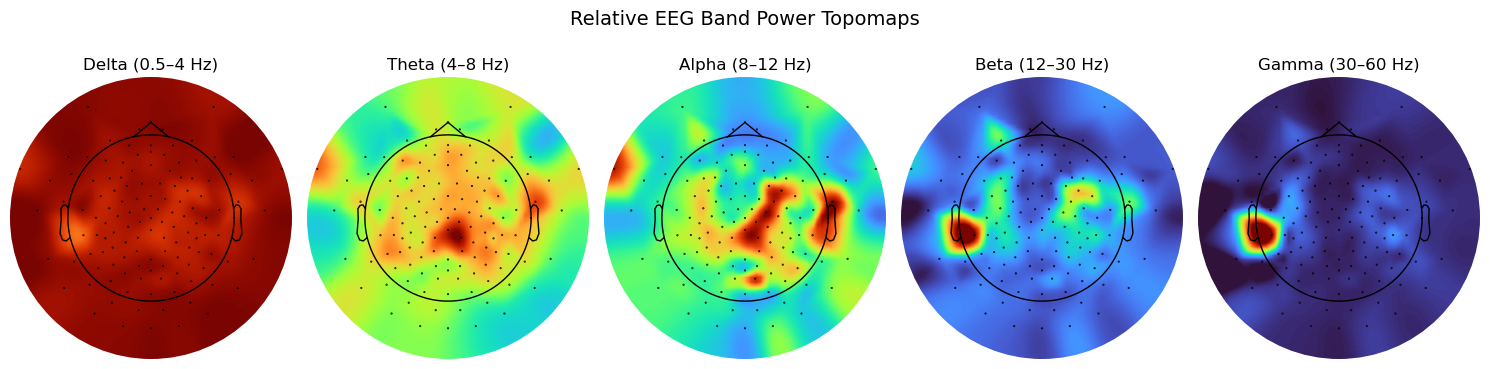

In [48]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch

# ============================================================
# STEP 1: Load your cleaned EEG data
# ============================================================
raw = mne.io.read_raw_fif(
    "./processed/sub-NDARAA396TWZ_task-DespicableMe_eeg_clean.fif",
    preload=True
)

# Pick only EEG channels (skip EOG, bads, etc.)
raw.pick_types(eeg=True, meg=False, eog=False)
raw.info["bads"] = []  # optional: clear bad channels
data = raw.get_data(picks='eeg')
sfreq = raw.info['sfreq']

# ============================================================
# STEP 2: Compute PSD using Welch’s method
# ============================================================
psds, freqs = psd_array_welch(
    data,
    sfreq=sfreq,
    fmin=0.5,
    fmax=60,
    n_fft=2048,
    n_overlap=1024,
    average="mean",
    verbose=False
)
# psds shape = (n_channels, n_freqs)
# Units: V^2/Hz

# ============================================================
# STEP 3: Compute relative band power
# ============================================================
bands = {
    "Delta (0.5–4 Hz)": (0.5, 4),
    "Theta (4–8 Hz)": (4, 8),
    "Alpha (8–12 Hz)": (8, 12),
    "Beta (12–30 Hz)": (12, 30),
    "Gamma (30–60 Hz)": (30, 60),
}

total_power = np.sum(psds, axis=1, keepdims=True)
band_rel_power = {}

for band, (fmin, fmax) in bands.items():
    idx = np.logical_and(freqs >= fmin, freqs <= fmax)
    band_power = np.sum(psds[:, idx], axis=1, keepdims=True)
    band_rel_power[band] = (band_power / total_power).ravel()

# ============================================================
# STEP 4: Plot topomaps for each frequency band
# ============================================================
fig, axes = plt.subplots(1, len(bands), figsize=(15, 4))

for ax, (band, data) in zip(axes, band_rel_power.items()):
    mne.viz.plot_topomap(
        data,
        raw.info,
        axes=ax,
        show=False,
        contours=0,
        cmap="turbo",
        names=None,
    )
    ax.set_title(band)

fig.suptitle("Relative EEG Band Power Topomaps", fontsize=14)
plt.tight_layout()
plt.show()

